2024-09-23 09:59:26.328735: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-23 09:59:26.356778: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-23 09:59:26.850654: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


26    0
86    1
2     0
55    1
75    1
93    1
16    0
73    1
54    1
95    1
53    1
92    1
78    1
13    0
7     0
30    0
22    0
24    0
33    0
8     0
Name: Species, dtype: int64
Epoch 1/500


/home/scientist/virtual/virtual_jupyter/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.5070 - loss: 0.6514 - val_accuracy: 0.5500 - val_loss: 0.6440
Epoch 2/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5469 - loss: 0.6473 - val_accuracy: 0.5500 - val_loss: 0.6428
Epoch 3/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5898 - loss: 0.6295 - val_accuracy: 0.5500 - val_loss: 0.6415
Epoch 4/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5859 - loss: 0.6196 - val_accuracy: 0.5500 - val_loss: 0.6403
Epoch 5/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5805 - loss: 0.6384 - val_accuracy: 0.5500 - val_loss: 0.6390
Epoch 6/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5789 - loss: 0.6386 - val_accuracy: 0.5500 - val_loss: 0.6378
Epoch 7/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5984 - loss: 0.6296 - val_accuracy: 0.5500 - val_loss: 0.6365
Epoch 8/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5867 - loss: 0.6236 - val_accuracy: 0.5500 - val_loss: 0.6352
Epoch 9/500

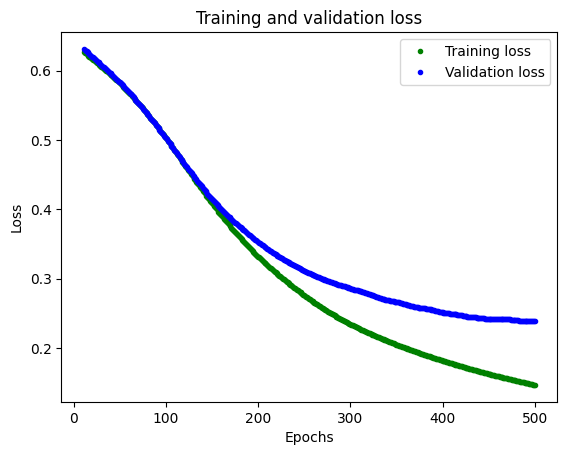

[array([[ 0.50914556, -0.18116623, -0.04498423],
       [ 0.33949652, -0.42303845, -0.37400272],
       [-1.4968083 ,  1.2034143 ,  0.95544535],
       [-1.344156  ,  0.39220142,  1.2244085 ]], dtype=float32), array([0.83684736, 0.5311056 , 0.7652087 ], dtype=float32), array([[-2.1645586 ,  1.3892978 ],
       [ 0.43439832, -1.8758974 ],
       [ 0.92036045, -1.5745732 ]], dtype=float32), array([0.9615521, 0.4445824], dtype=float32), array([[ 1.6905344],
       [-2.6346245]], dtype=float32), array([0.4316521], dtype=float32)]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
[0.11 0.89 0.11 0.89 0.89 0.89 0.12 0.85 0.89 0.89 0.89 0.89 0.89 0.11
 0.1  0.1  0.56 0.1  0.84 0.1 ]
[0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 0 1 0 1 0]


array([[ 8,  2],
       [ 0, 10]])

In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pima = pd.read_csv("iris.csv")
pima.head()

# split dataset in features and target variable
feature_cols = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']
Xraw = pima[feature_cols] # Features
y = pima.Species # Target variable

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(Xraw)

# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)
print(y_test)

# neural network
model = tf.keras.Sequential()
model.add(keras.layers.Dense(3, activation='relu', input_shape=(4,)))
model.add(keras.layers.Dense(2,activation='sigmoid'))
model.add(keras.layers.Dense(1,activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_1 = model.fit(X_train, y_train, epochs=500, validation_data=(X_test, y_test))

# visualization of lossfunction
loss = history_1.history['loss']
val_loss = history_1.history['val_loss']
epochs = range(1, len(loss) + 1)
SKIP = 10
plt.plot(epochs[SKIP:], loss[SKIP:], 'g.', label='Training loss')
plt.plot(epochs[SKIP:], val_loss[SKIP:], 'b.', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Find the weights of the model
weights = model.get_weights()
print(weights)

# Saving the array in a text file
file = open("hyper_param_small.txt", "w+")
content = str(weights)
file.write(content)
file.close()

#y_pred = model.predict(X_test)
# extract the predicted probabilities
p_pred = model.predict(X_test)
p_pred = p_pred.flatten()
print(p_pred.round(2))

# extract the predicted class labels
y_pred = np.where(p_pred > 0.5, 1, 0)
print(y_pred)

# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix